In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

In [2]:
occ_map_path = 'runs/replica_00/occupancy_grid_thres10.npz'
grid = np.load(occ_map_path)['map']

In [3]:
grid_dims = grid.shape
net_dims = (24, 42, 23)
x_coords = np.linspace(0, grid_dims[0], net_dims[0]+1).astype(int)
y_coords = np.linspace(0, grid_dims[1], net_dims[1]+1).astype(int)
z_coords = np.linspace(0, grid_dims[2], net_dims[2]+1).astype(int)

In [4]:
indices = [(i, j, k) for i in range(net_dims[0]) for j in range(net_dims[1]) for k in range(net_dims[2])]
net_grid = np.zeros(net_dims)

for i, j, k in indices:
    x1, x2 = x_coords[i], x_coords[i+1]
    y1, y2 = y_coords[j], y_coords[j+1]
    z1, z2 = z_coords[k], z_coords[k+1]
    net_grid[i, j, k] = np.sum(grid[x1:x2, y1:y2, z1:z2])

In [19]:
np.sum(net_grid > 50)

7863

<IPython.core.display.Javascript object>


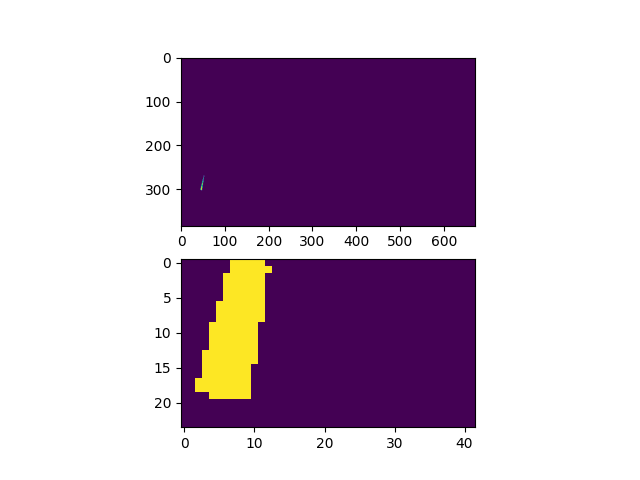

interactive(children=(IntSlider(value=183, description='z', max=367), Output()), _dom_classes=('widget-interac…

In [21]:
%matplotlib notebook
fig, (ax1, ax2) = plt.subplots(2, 1)

def update(z):
    ax1.clear()
    ax1.imshow(grid[:, :, z])
    ax2.clear()
    ax2.imshow(net_grid[:, :, z // 16] > 10)

interact(update, z=(0, 367));